In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


### Drop unnecessary columns

In [6]:
unnecessary_col = ['PassengerId', 'Cabin', 'Ticket', 'Name']

df.drop(unnecessary_col, axis =1, inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


### Converted the object value

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

sex_converted = label_encoder.fit_transform(df['Sex'])
print(label_encoder.classes_)
print(sex_converted)

print('---------')
embarked_converted = label_encoder.fit_transform(df['Embarked'])
print(label_encoder.classes_)
print(embarked_converted)

['female' 'male']
[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1
 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1
 1 0 1 

In [10]:
df_converted = df.copy()

In [11]:
df_converted.Sex = sex_converted
df_converted.Embarked = embarked_converted

In [12]:
df_converted

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,2
885,1,1,0,19.0,0,0,30.0000,2
886,0,3,0,45.0,1,2,23.4500,2
887,1,1,1,26.0,0,0,30.0000,0


## Build random forest to find which IDV that has effect the most

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
X = df_converted.drop('Survived', axis = 1)
y = df_converted['Survived']

In [15]:
rfc = RandomForestClassifier(n_estimators=100, max_features=6, oob_score=True)
rfc.fit(X, y)
rfc.oob_score_

0.8110236220472441

In [16]:
ft_importances = rfc.feature_importances_
ft_importances

array([0.10118038, 0.29732209, 0.24562934, 0.04623369, 0.02558043,
       0.25093237, 0.03312169])

In [17]:
rfc_ft_df = pd.DataFrame(data= ft_importances, index= X.columns, 
                         columns=['Value']).sort_values('Value', ascending = False)
rfc_ft_df

,Value
Sex,0.297322
Fare,0.250932
Age,0.245629
Pclass,0.101180
SibSp,0.046234
Embarked,0.033122
Parch,0.025580


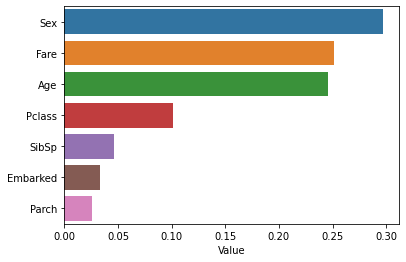

In [18]:
sns.barplot(x=rfc_ft_df.Value, y = rfc_ft_df.index )
plt.show()

As can we see that, 3 independent variables (Fare, Sex, Age) which have high impact on the dependent var (Survived)

## Ploting Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [20]:
X_importance = df_converted[['Fare', 'Age', 'Sex']]

In [21]:
dtc = DecisionTreeClassifier(max_depth=20, max_features=3,
                             criterion='gini',
                             min_samples_split=15,
                             max_leaf_nodes= 22)


print(dtc)
dtc.fit(X_importance, y)
dtc.score(X_importance, y)

DecisionTreeClassifier(max_depth=20, max_features=3, max_leaf_nodes=22,
                       min_samples_split=15)


0.8368953880764904

In [22]:
## Predict the data_test

df_test = pd.read_csv('dataset/test.csv')
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [23]:
test_sex_converted = label_encoder.fit_transform(df_test['Sex'])
print(label_encoder.classes_)
print(test_sex_converted)
df_test['Sex'] = test_sex_converted


['female' 'male']
[1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0
 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0
 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1
 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 0 1 1 1]


In [24]:
X_importance.columns

Index(['Fare', 'Age', 'Sex'], dtype='object')

In [25]:
predicted_test = dtc.predict(df_test[['Fare', 'Age', 'Sex']])

In [26]:
output = pd.DataFrame({'PassengerID' : df_test.PassengerId, 'Survived' : predicted_test})

In [27]:
output.to_csv('output_titanic.csv', sep=';',index= False )

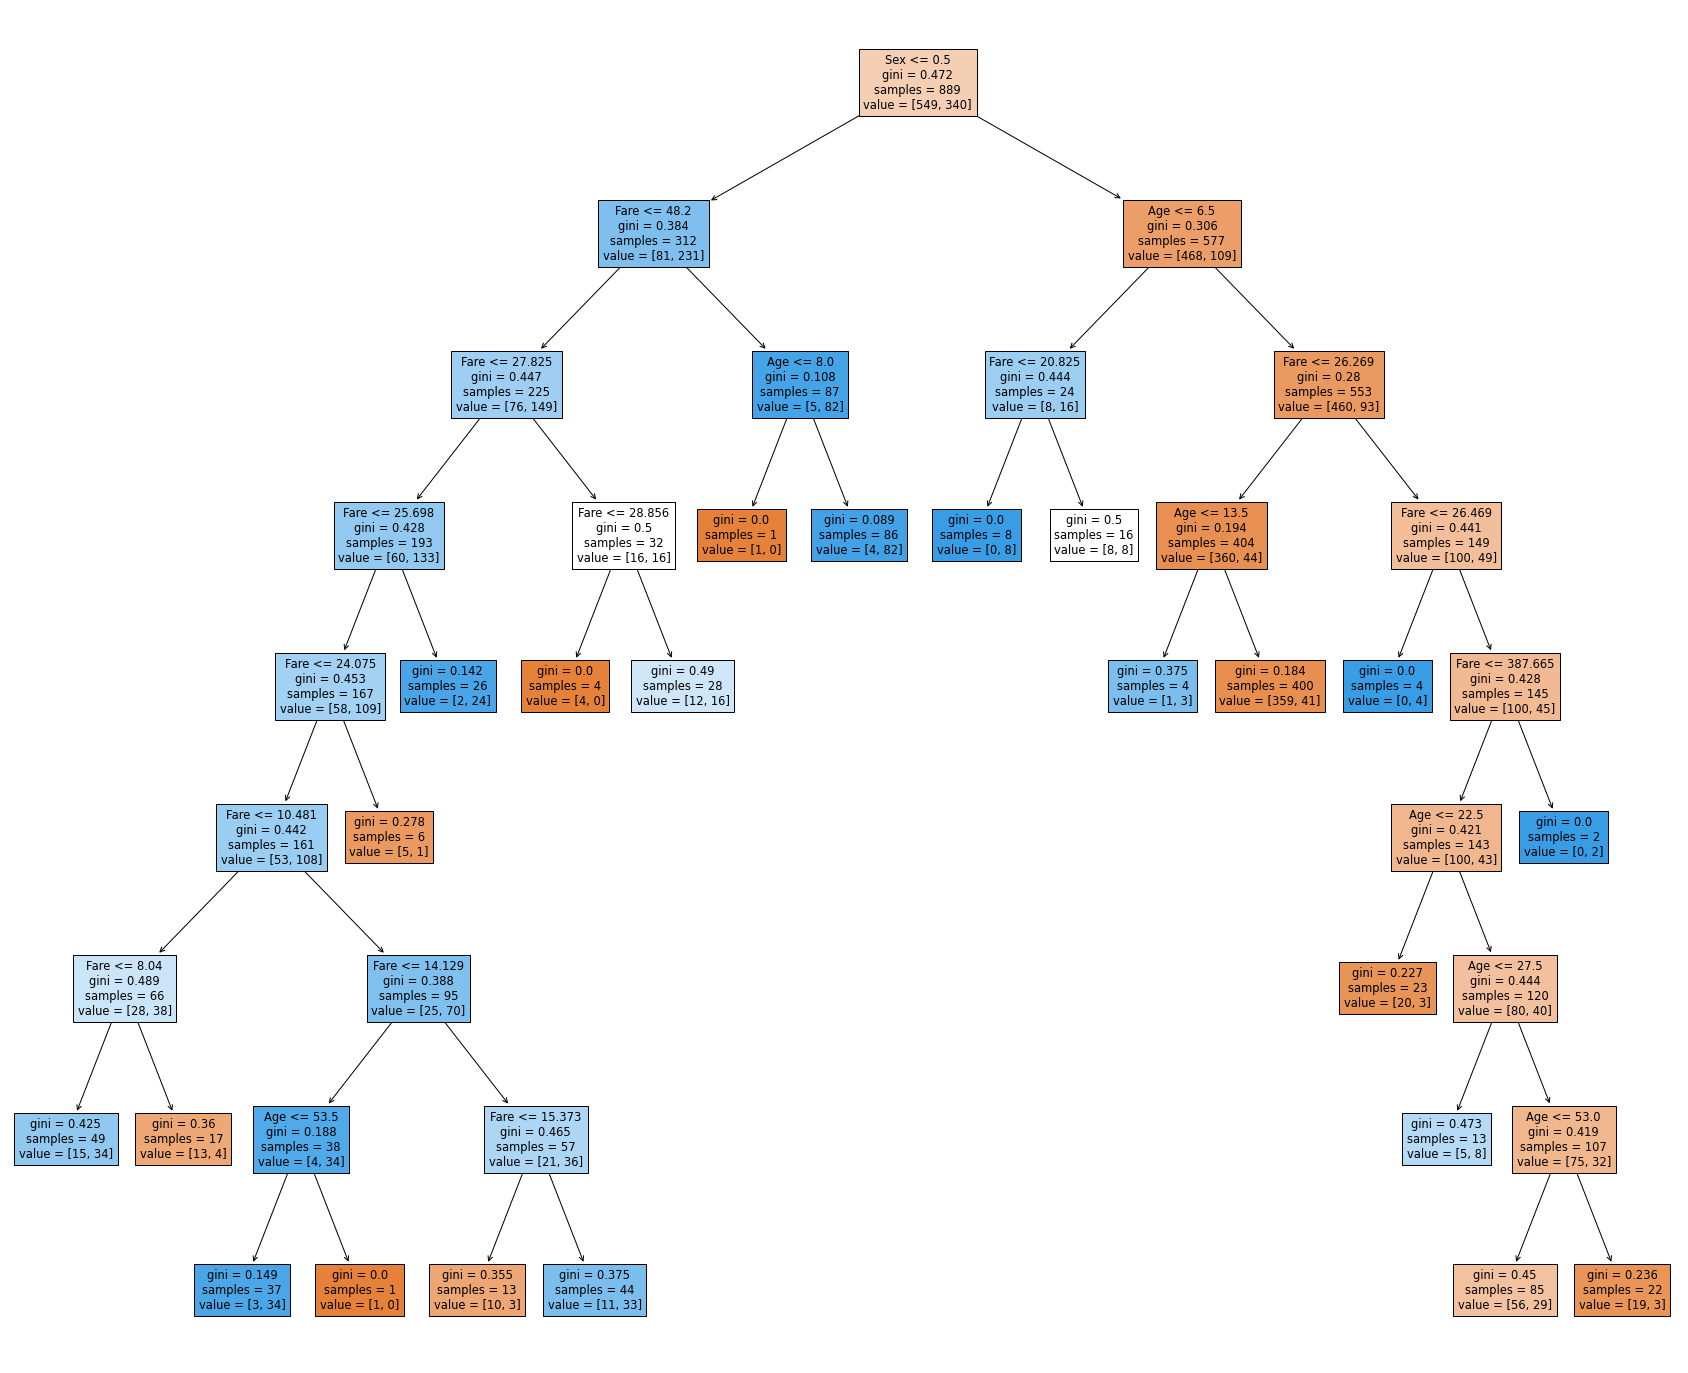

In [28]:
fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(dtc, 
                   feature_names=X_importance.columns,
                   filled=True)

In [29]:
fig.savefig("decistion_tree_Titanic.png")

## Rule for Decision Tree Attrition Project

- if sex > 0.5 and Age <= 6.5 and Fare <= 20.825, survived (1)
- if sex > 0.5 and Age <= 6.5 and Fare > 20.825, survived (1)
- if sex > 0.5  and 6.5 < Age <= 13.5 and Fare <= 26.269, survived (1)
- if sex > 0.5  and  Age > 13.5 and Fare <= 26.269, survived (0)
- if sex > 0.5  and  Age > 6.5 and Fare <= 26.469, survived (1)
- if sex > 0.5  and Age > 6.5 and Fare > 387.665, survived (1)
-  if sex > 0.5  and  6.5 < Age <= 22.5 and Fare <= 387.665, survived (0) 
- if sex > 0.5  and  22.5 < Age <= 27.5 and Fare <= 387.665, survived (1) 
- if sex > 0.5  and  27.5 < Age <= 53 and Fare <= 387.665, survived (0) 
- if sex > 0.5  and Age > 53 and Fare <= 387.665, survived (0) 
- if sex <= 0.5 and fare > 48.2 and age > 8 , survived (1)
- if sex <= 0.5 and fare > 48.2 and age <= 8 , survived (0)
- if sex <= 0.5 and 28.856 < fare <= 48.2  , survived (1)
- if sex <= 0.5 and  27.825 < fare <= 28.856  , survived (0)
- if sex <= 0.5 and  25.698 < fare <= 27.825  , survived (1)
- if sex <= 0.5 and  24.075 < fare <= 25.698  , survived (0)
- if sex <= 0.5 and  8.04 < fare <= 10.481 , survived (0)
- if sex <= 0.5 and fare <= 8.04, survived (1)
- if sex <= 0.5 and  10.481 < fare <= 14.129 and Age <= 53.5 , survived (1)
- if sex <= 0.5 and  10.481 < fare <= 14.129 and Age > 53.5 , survived (0)
- if sex <= 0.5 and  10.481 < fare <= 15.373 , survived (0)
- if sex <= 0.5 and   fare > 15.373 , survived (1)